# A Perspective on Northeast Ohio Weather
### By Anthony Furiga
##### December 10th, 2024

I have always been someone who is intrigued by weather, and I wanted to use this final assignmnent to take a look at a golbal-topic of concern: Climate Change.  I want to see if the northeast Ohio area is experiencing any changes in its climate.  And if it is changing, is it a cause of concern for those living there.  I am native to the northeast Ohio area and my goal is for anyone who lives here like myself will see the data and accept my claims about the climate here.

I got my data from the National Centers For Environmental Information, which has free data for download on weather information for any location in the US.  They provide resources about weather and climate information that is reliable for anyone to access.  And from what I could tell, they collect their own information.  I could only download up to "1,000 station years" worth of data, which is why I had to request multiple CSV files.  I still do not know what the difference between a station year and a normal year is.

Here is the link to which you can request the data: https://www.ncdc.noaa.gov/cdo-web/search

The tutorial for requesting data from the website can be found here: https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
weather1950 = pd.read_csv('Data Final Project/weather1950.csv')
weather1960 = pd.read_csv('Data Final Project/weather1960.csv')
weather1970 = pd.read_csv('Data Final Project/weather1970.csv')
weather1980 = pd.read_csv('Data Final Project/weather1980.csv')
weather1990 = pd.read_csv('Data Final Project/weather1990.csv')
weather2000 = pd.read_csv('Data Final Project/weather2000.csv')
weather2010 = pd.read_csv('Data Final Project/weather2010.csv')
only1950 = pd.read_csv('Data Final Project/weatheronly1950.csv')
only2001 = pd.read_csv('Data Final Project/weatheronly2001.csv')
only2023 = pd.read_csv('Data Final Project/weatheronly2023.csv')

Loading in my CSV files with pandas.

In [3]:
weather1950.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-01,0.01,0.0,0.0,NaN,48,41
1,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-02,0.48,0.0,0.0,NaN,55,47
2,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-03,0.53,0.0,0.0,NaN,61,52
3,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-04,0.70,0.0,0.0,NaN,57,28
4,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-05,0.08,0.4,0.0,NaN,32,24


I have shown the data frame of one of my CSV files.  Each CSV file has weather information for ten years starting from January 1st, 1950.  However, the weather_2010 CSV file has weather info from January 2nd, 2010 (accounting for off-by-one) to November 20th, 2024, as that was the most recent I could get info from the website and I didn't want another CSV file to load in and eventually have to merge into one single data frame.  

Looking at the data frame, here is what the column names represent:
* Station: This is a code of the station that the data was pulled from.
* Name: Name of the station.  I got my data from the Cleveland Hopkins International Airport Station.
* Date: Date of recorded observations.
* PRCP: Precipitation, measured in inches.
* SNOW: Snowfall, measured in inches.
* SNWD: Snowdepth (Snow on ground), measured in inches.
* TAVG: Average of hourly vaules for temperatures. Shows NaN as we don't have information on hourly temperatures.
* TMAX: Temperature max, measured in Fahrenheit.
* TMIN: Temperature minimum, measured in Fahrenheit.

I decided to use the Cleveland Hopkins International station for two reasons.  One, this specific station was one of the few stations in northeast Ohio that is still recording data; many northeast Ohio weather stations I could get data from have since closed or no longer record data.  Second, I discovered that not all weather record the same data or specific data types at all, so trying to get consistent data across stations is very difficult.  While I do believe that the information from this one specific station will be a good indicator of the weather across the region, it would be wise to collect more data from different stations across the area. 

## Temperature Observations

This section will take a look at the recorded high & low temperatures from the Cleveland Hopkins weather station.

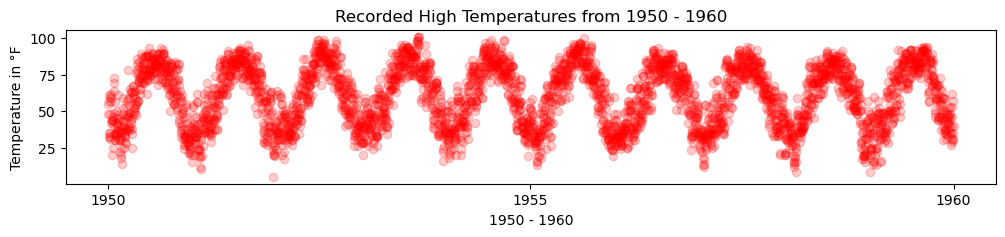

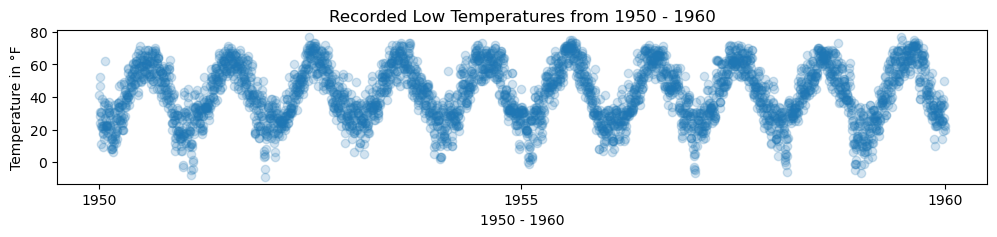

In [14]:
fig1, ax1 = plt.subplots(figsize = (12,2))
ax1.scatter(x = weather1950['DATE'], y = weather1950['TMAX'], alpha = 0.2, color = 'red')
ax1.set_xlabel('1950 - 1960')
ax1.set_ylabel('Temperature in °F')
ax1.set_xticks([weather1950['DATE'][0], weather1950['DATE'][1822], weather1950['DATE'][3652]])
ax1.set_xticklabels(['1950','1955','1960'])
ax1.set_title('Recorded High Temperatures from 1950 - 1960')
plt.show()

fig2, ax2 = plt.subplots(figsize = (12,2))
ax2.scatter(x = weather1950['DATE'], y = weather1950['TMIN'], alpha = 0.2)
ax2.set_xlabel('1950 - 1960')
ax2.set_ylabel('Temperature in °F')
ax2.set_xticks([weather1950['DATE'][0], weather1950['DATE'][1822], weather1950['DATE'][3652]])
ax2.set_xticklabels(['1950','1955','1960'])
ax2.set_title('Recorded Low Temperatures from 1950 - 1960')
plt.show()

# I did use ChatGPT to get the set_xticks & set_xticklabels working

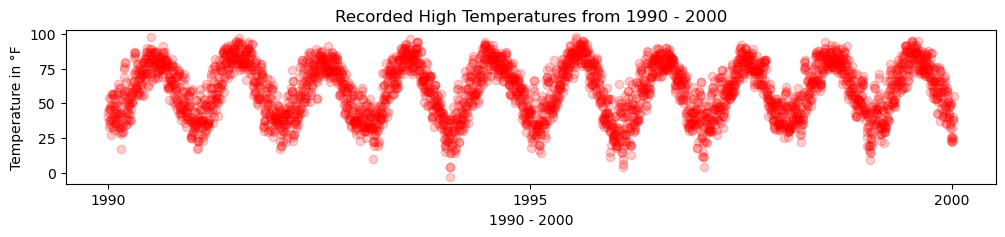

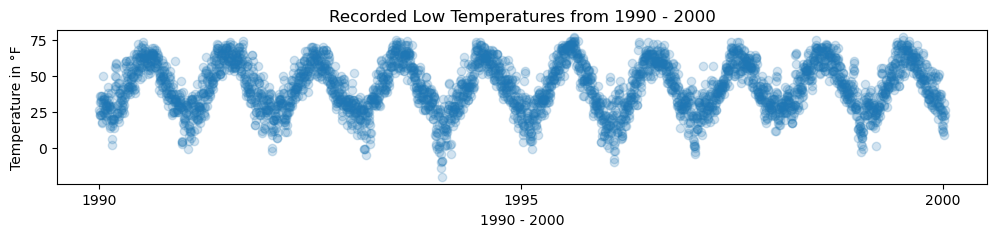

In [15]:
fig3, ax3 = plt.subplots(figsize = (12,2))
ax3.scatter(x = weather1990['DATE'], y = weather1990['TMAX'], alpha = 0.2, color = 'red')
ax3.set_xlabel('1990 - 2000')
ax3.set_ylabel('Temperature in °F')
ax3.set_xticks([weather1990['DATE'][0], weather1990['DATE'][1822], weather1990['DATE'][3642]])
ax3.set_xticklabels(['1990','1995','2000'])
ax3.set_title('Recorded High Temperatures from 1990 - 2000')
plt.show()

fig4, ax4 = plt.subplots(figsize = (12,2))
ax4.scatter(x = weather1990['DATE'], y = weather1990['TMIN'], alpha = 0.2)
ax4.set_xlabel('1990 - 2000')
ax4.set_ylabel('Temperature in °F')
ax4.set_xticks([weather1990['DATE'][0], weather1990['DATE'][1822], weather1990['DATE'][3642]])
ax4.set_xticklabels(['1990','1995','2000'])
ax4.set_title('Recorded Low Temperatures from 1990 - 2000')
plt.show()

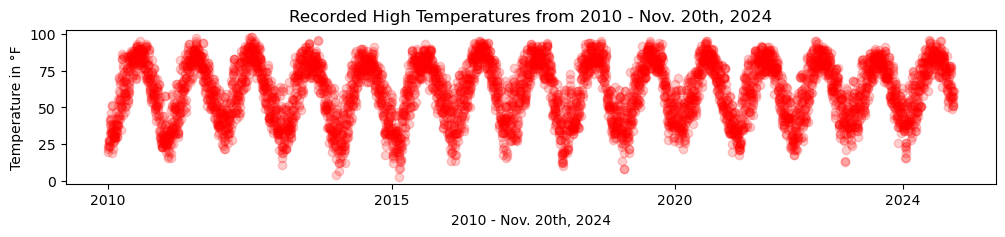

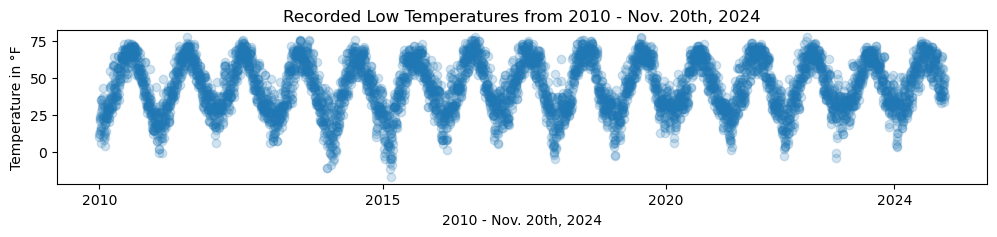

In [17]:
fig5, ax5 = plt.subplots(figsize = (12,2))
ax5.scatter(x = weather2010['DATE'], y = weather2010['TMAX'], alpha = 0.2, color = 'red')
ax5.set_xlabel('2010 - Nov. 20th, 2024')
ax5.set_ylabel('Temperature in °F')
ax5.set_xticks([weather2010['DATE'][0], weather2010['DATE'][1822], weather2010['DATE'][3642], weather2010['DATE'][5112]])
ax5.set_xticklabels(['2010','2015','2020', '2024'])
ax5.set_title('Recorded High Temperatures from 2010 - Nov. 20th, 2024')
plt.show()

fig6, ax6 = plt.subplots(figsize = (12,2))
ax6.scatter(x = weather2010['DATE'], y = weather2010['TMIN'], alpha = 0.2)
ax6.set_xlabel('2010 - Nov. 20th, 2024')
ax6.set_ylabel('Temperature in °F')
ax6.set_xticks([weather2010['DATE'][0], weather2010['DATE'][1822], weather2010['DATE'][3642], weather2010['DATE'][5112]])
ax6.set_xticklabels(['2010','2015','2020', '2024'])
ax6.set_title('Recorded Low Temperatures from 2010 - Nov. 20th, 2024')
plt.show()

Looking at the yearly graphs of high & low temperatures, there does not seem to be any sort of immediate visual depiction of temperatures becoming generally warmer.  In all of the graphs, there is a general pattern of each year starting with low values (since we begin the year in winter) and hen generally reach the highest values mid-year (during the summer when the sun is out more).  There seems to be some years where the winter was especially pretty cold (1951, 1952, 1957, 1958, 1959, 1994, 2014, and 2015), but I believe these were just outlier years.

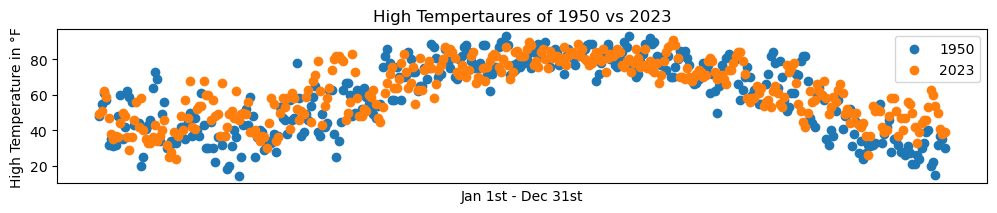

In [10]:
fig7, ax7 = plt.subplots(figsize = (12,2))
ax7.scatter(x = only1950['DATE'], y = only1950['TMAX'])
ax7.scatter(x = only1950['DATE'], y = only2023['TMAX'])
ax7.set_xlabel('Jan 1st - Dec 31st')
ax7.set_ylabel('High Temperature in °F')
ax7.set_xticks([])
ax7.legend(['1950', '2023'])
ax7.set_title('High Tempertaures of 1950 vs 2023')
plt.show()

Shown above is a comparison of the higest temperatures from 1950 vs. 2023.  They line up pretty closely, however at the far right end of the graph getting towards November-December, 2023 has dots plotted higher on the graph, meaning the high temperature of the day has been getting hotter.  They seem to generally hang around 50°-60°, whereas in 1950 those high temperatures were closer to 30°-40°.

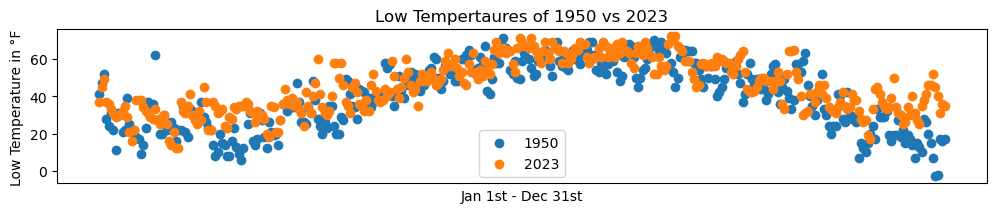

In [11]:
fig8, ax8 = plt.subplots(figsize = (12,2))
ax8.scatter(x = only1950['DATE'], y = only1950['TMIN'])
ax8.scatter(x = only1950['DATE'], y = only2023['TMIN'])
ax8.set_xlabel('Jan 1st - Dec 31st')
ax8.set_ylabel('Low Temperature in °F')
ax8.set_xticks([])
ax8.legend(['1950', '2023'])
ax8.set_title('Low Tempertaures of 1950 vs 2023')
plt.show()

This graph shows the low temperature comparison of the same set of data, and just like the graph above, we can see near November-December that 2023 has higher low temperatures than in 1950.

## Precipitation Observations

This section will take a look at recorded precipitaion numbers from the Cleveland Hopkins weather station.

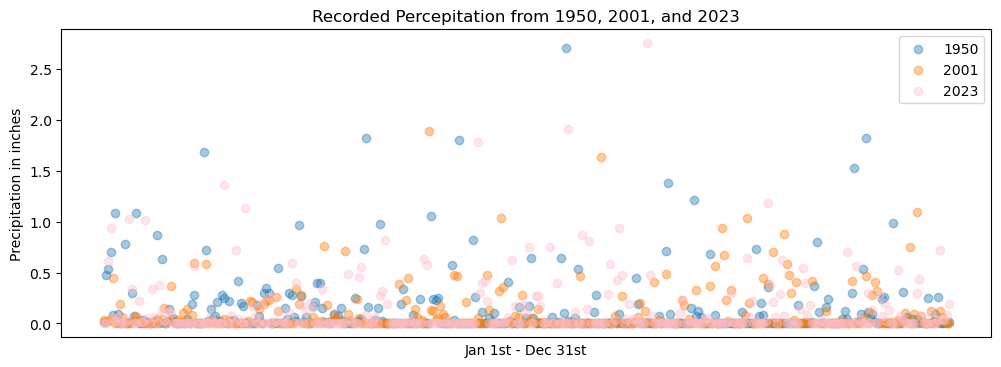

In [12]:
fig9, ax9 = plt.subplots(figsize = (12,4))
ax9.scatter(x = only1950['DATE'], y = only1950['PRCP'], alpha = 0.4)
ax9.scatter(x = only1950['DATE'], y = only2001['PRCP'], alpha = 0.4)
ax9.scatter(x = only1950['DATE'], y = only2023['PRCP'], color = 'pink', alpha = 0.4)
ax9.set_xlabel('Jan 1st - Dec 31st')
ax9.set_ylabel('Precipitation in inches')
ax9.set_xticks([])
ax9.legend(['1950', '2001', '2023'])
ax9.set_title('Recorded Precepitation from 1950, 2001, and 2023')
plt.show()

Here we have a graph of the precipitation from the years of 1950, 2001, and 2023.  I decided to use 1950 and 2023 as these are the oldest and newest full years I have of data respectively, and then I choose 2001 out of random to see any potential interim changes between the two.  And by looking at the three, there seems to be no sort of pattern whatsoever.  

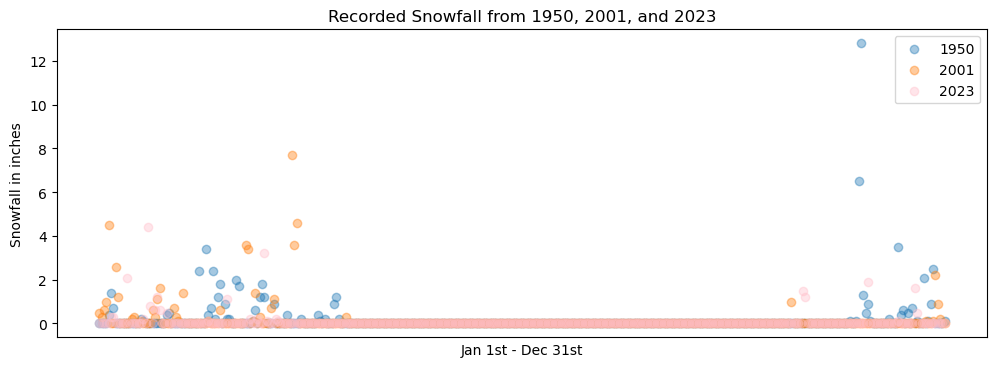

In [13]:
fig10, ax10 = plt.subplots(figsize = (12,4))
ax10.scatter(x = only1950['DATE'], y = only1950['SNOW'], alpha = 0.4)
ax10.scatter(x = only1950['DATE'], y = only2001['SNOW'], alpha = 0.4)
ax10.scatter(x = only1950['DATE'], y = only2023['SNOW'], color = 'pink', alpha = 0.4)
ax10.set_xlabel('Jan 1st - Dec 31st')
ax10.set_ylabel('Snowfall in inches')
ax10.set_xticks([])
ax10.legend(['1950', '2001', '2023'])
ax10.set_title('Recorded Snowfall from 1950, 2001, and 2023')
plt.show()

This graph is recorded snowfall from the same three years.  The difference between this graph and the precipitation graph is that the precipitation measurement records all kinds of precipitation (Rainfall, Snowfall, Sleet, Hail), whereas the snowfall graph is just snowfall. We can see that 2001 & 2023 has had very little recorded snowfall compared to 1950.  I will go a bit more into this in the section below.

## Analysis

Reviewing the data, I believe that there is evidence for a shift in the climate of the northeast Ohio area.  The 'troughs' of the temperatures in the decade-long graphs seems to be rising in recent times, and as noted in comparison between the 1950-2023 graph of temperatures.  There is also a decrease in recorded days of snowfall in 2023 compared to 1950 & 2001, when there is still a lot of precipitation being recorded.  This means we are moving away from a climate of snow and more so a wet-winter kind of climate.  I definetly do think this is something to be concerned about.  However, I think it will take longer for us to experience any real catastrophic consequences as compared to other places.

The main drawback with my project is that there are many other factors that could've been taken into account when trying to determine if the NE Ohio area has been experiencing any shift in climate.  This includes things like severe weather increase/decrease, humidity, wind, etc.  The website that I was pulling from does not have all of this information, and so it would be wise to search for other sources that may have that info.

Going off of this, I have been viewing the winter months as my evidence for climate change, but this doesn't necessarily mean that the summer months aren't experiencing any change - it's just harder to make an argument for with the current data that I have.

I think the next steps of this project would be finding more data with different information than the ones that I have to really help support/disprove the idea that the NE Ohio area is expereincing any sort of change in climate.